# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?" + "&appid=" + weather_api_key

In [5]:
print(base_url)

http://api.openweathermap.org/data/2.5/weather?&appid=b21b7a3e5dee310f5f7f6d8b53c1ee75&units=metric


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = base_url + "&units=" + units + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | burang
Processing Record 6 of Set 1 | slave lake
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | villa huidobro
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | ambodifotatra
Processing Record 14 of Set 1 | slobozia
Processing Record 15 of Set 1 | nyagan
Processing Record 16 of Set 1 | siniscola
Processing Record 17 of Set 1 | hell-ville
Processing Record 18 of Set 1 | la ronge
Processing Record 19 of Set 1 | kingscliff
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | grytviken
Processing Record 

In [8]:
# print out to check it stored in lists
city_data

[{'City': 'Saipan',
  'Lat': 15.1355,
  'Lng': 145.701,
  'Max Temp': 29.39,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 8.75,
  'Country': 'MP',
  'Date': '2023-04-22 03:28:07'},
 {'City': 'College',
  'Lat': 64.8569,
  'Lng': -147.8028,
  'Max Temp': 6.97,
  'Humidity': 49,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'US',
  'Date': '2023-04-22 03:29:31'},
 {'City': 'Port-Aux-Francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 4.88,
  'Humidity': 71,
  'Cloudiness': 86,
  'Wind Speed': 7.99,
  'Country': 'TF',
  'Date': '2023-04-22 03:29:31'},
 {'City': 'Polyarnyy',
  'Lat': 69.1989,
  'Lng': 33.4478,
  'Max Temp': -3.71,
  'Humidity': 78,
  'Cloudiness': 96,
  'Wind Speed': 6.91,
  'Country': 'RU',
  'Date': '2023-04-22 03:29:32'},
 {'City': 'Burang',
  'Lat': 30.25,
  'Lng': 81.1667,
  'Max Temp': -5.85,
  'Humidity': 79,
  'Cloudiness': 48,
  'Wind Speed': 1.7,
  'Country': 'CN',
  'Date': '2023-04-22 03:29:32'},
 {'City': 'Slave Lake',
  'Lat': 55.

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [10]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saipan,15.1355,145.7010,29.39,100,100,8.75,MP,2023-04-22 03:28:07
1,College,64.8569,-147.8028,6.97,49,100,1.54,US,2023-04-22 03:29:31
2,Port-Aux-Francais,-49.3500,70.2167,4.88,71,86,7.99,TF,2023-04-22 03:29:31
3,Polyarnyy,69.1989,33.4478,-3.71,78,96,6.91,RU,2023-04-22 03:29:32
4,Burang,30.2500,81.1667,-5.85,79,48,1.70,CN,2023-04-22 03:29:32
5,Slave Lake,55.2834,-114.7690,3.99,45,100,4.63,CA,2023-04-22 03:29:33
6,Kavaratti,10.5669,72.6420,28.81,71,11,3.83,IN,2023-04-22 03:29:34
7,Bethel,41.3712,-73.4140,11.47,79,100,4.12,US,2023-04-22 03:25:48
8,Blackmans Bay,-43.0167,147.3167,19.18,60,99,3.03,AU,2023-04-22 03:29:35
9,Villa Huidobro,-34.8383,-64.5869,13.15,71,0,1.35,AR,2023-04-22 03:29:35


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saipan,15.1355,145.7010,29.39,100,100,8.75,MP,2023-04-22 03:28:07
1,College,64.8569,-147.8028,6.97,49,100,1.54,US,2023-04-22 03:29:31
2,Port-Aux-Francais,-49.3500,70.2167,4.88,71,86,7.99,TF,2023-04-22 03:29:31
3,Polyarnyy,69.1989,33.4478,-3.71,78,96,6.91,RU,2023-04-22 03:29:32
4,Burang,30.2500,81.1667,-5.85,79,48,1.70,CN,2023-04-22 03:29:32


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

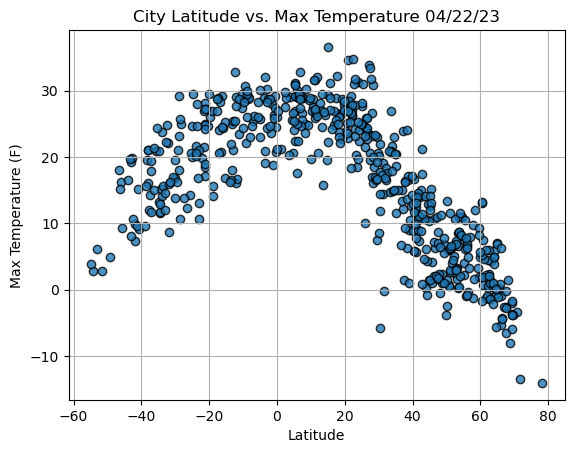

In [13]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

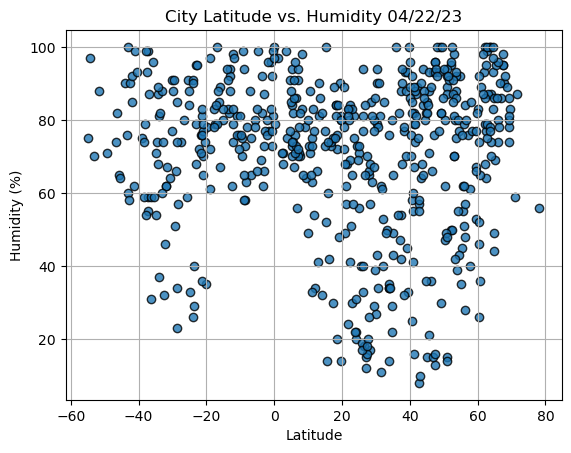

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

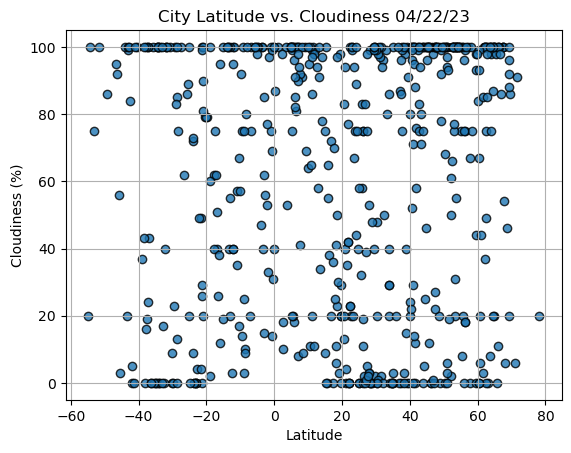

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

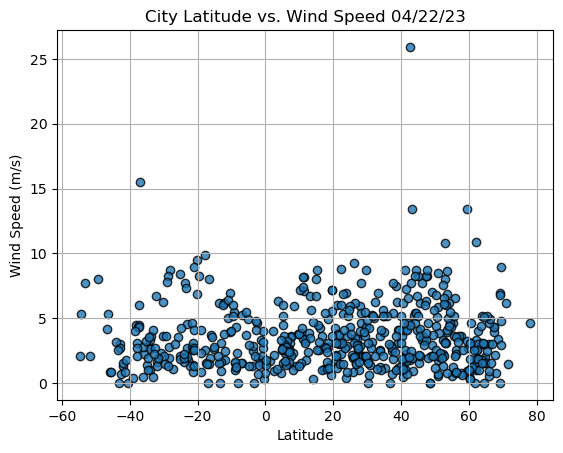

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saipan,15.1355,145.7010,29.39,100,100,8.75,MP,2023-04-22 03:28:07
1,College,64.8569,-147.8028,6.97,49,100,1.54,US,2023-04-22 03:29:31
3,Polyarnyy,69.1989,33.4478,-3.71,78,96,6.91,RU,2023-04-22 03:29:32
4,Burang,30.2500,81.1667,-5.85,79,48,1.70,CN,2023-04-22 03:29:32
5,Slave Lake,55.2834,-114.7690,3.99,45,100,4.63,CA,2023-04-22 03:29:33


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Port-Aux-Francais,-49.3500,70.2167,4.88,71,86,7.99,TF,2023-04-22 03:29:31
8,Blackmans Bay,-43.0167,147.3167,19.18,60,99,3.03,AU,2023-04-22 03:29:35
9,Villa Huidobro,-34.8383,-64.5869,13.15,71,0,1.35,AR,2023-04-22 03:29:35
10,Hermanus,-34.4187,19.2345,11.56,68,100,2.83,ZA,2023-04-22 03:29:36
11,Hithadhoo,-0.6000,73.0833,29.22,73,69,4.01,MV,2023-04-22 03:29:37


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7858989756943487


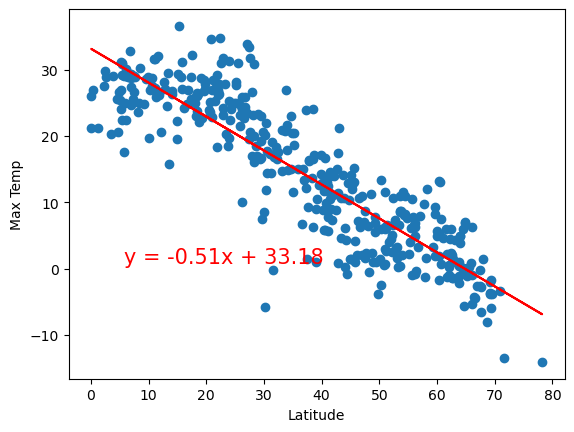

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5207672487162224


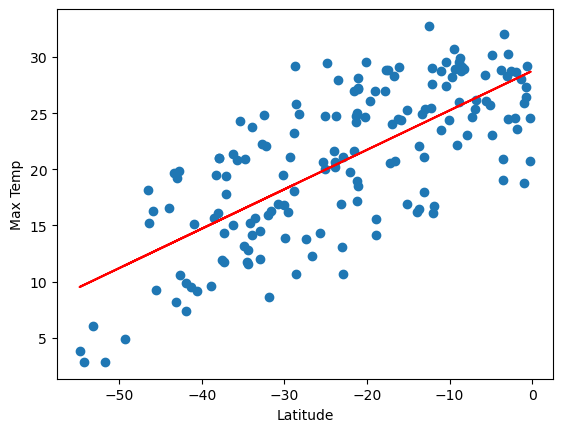

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a versy strong correlation between the latitude and maximum temperatures 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.011524855361749407


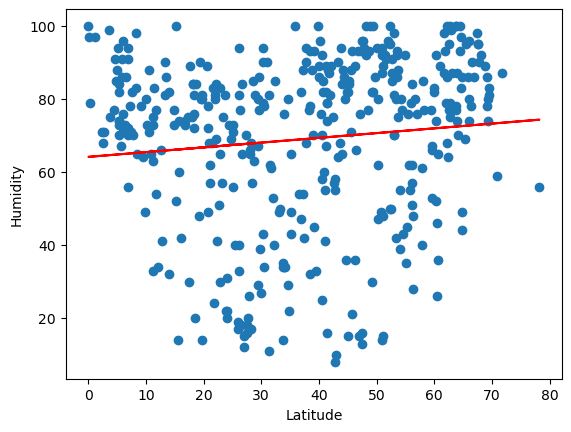

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.020761071746142043
y = 0.17x + 79.11


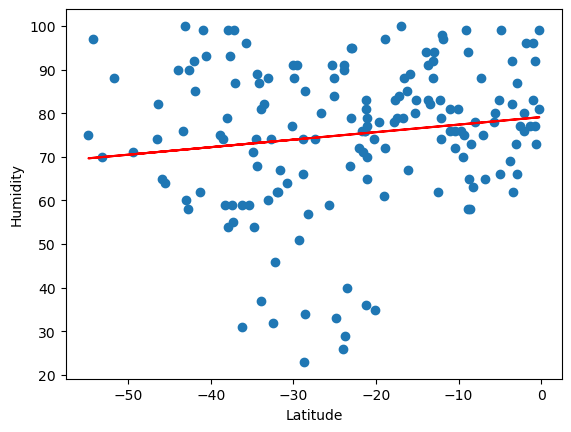

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between Humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.006685397216111035


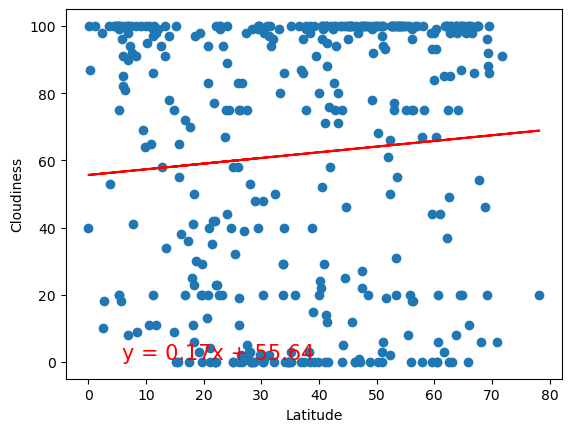

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.02056735429994368


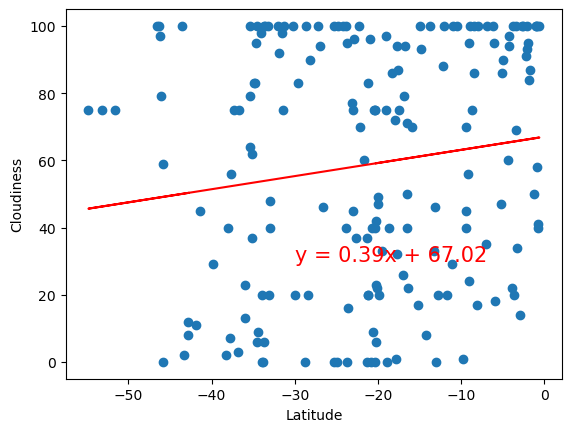

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between Cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


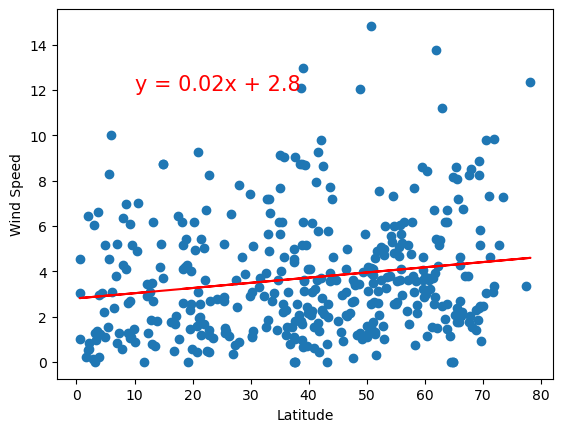

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.062239040700515696


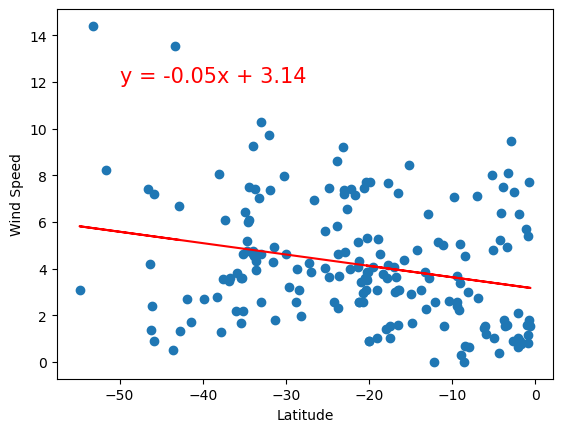

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between Wind Speed and latitude. 